In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Dataset features explained
- Negara : Nama negara
- Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
- Ekspor : Ekspor barang dan jasa perkapita
- Kesehatan: Total pengeluaran kesehatan perkapita
- Impor: Impor barang dan jasa perkapita
- Pendapatan: Penghasilan bersih perorang
- Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
- Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
- Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
- GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 

In [182]:
df = pd.read_csv('Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# checking for missing values

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


none found


In [169]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Multivariate analysis

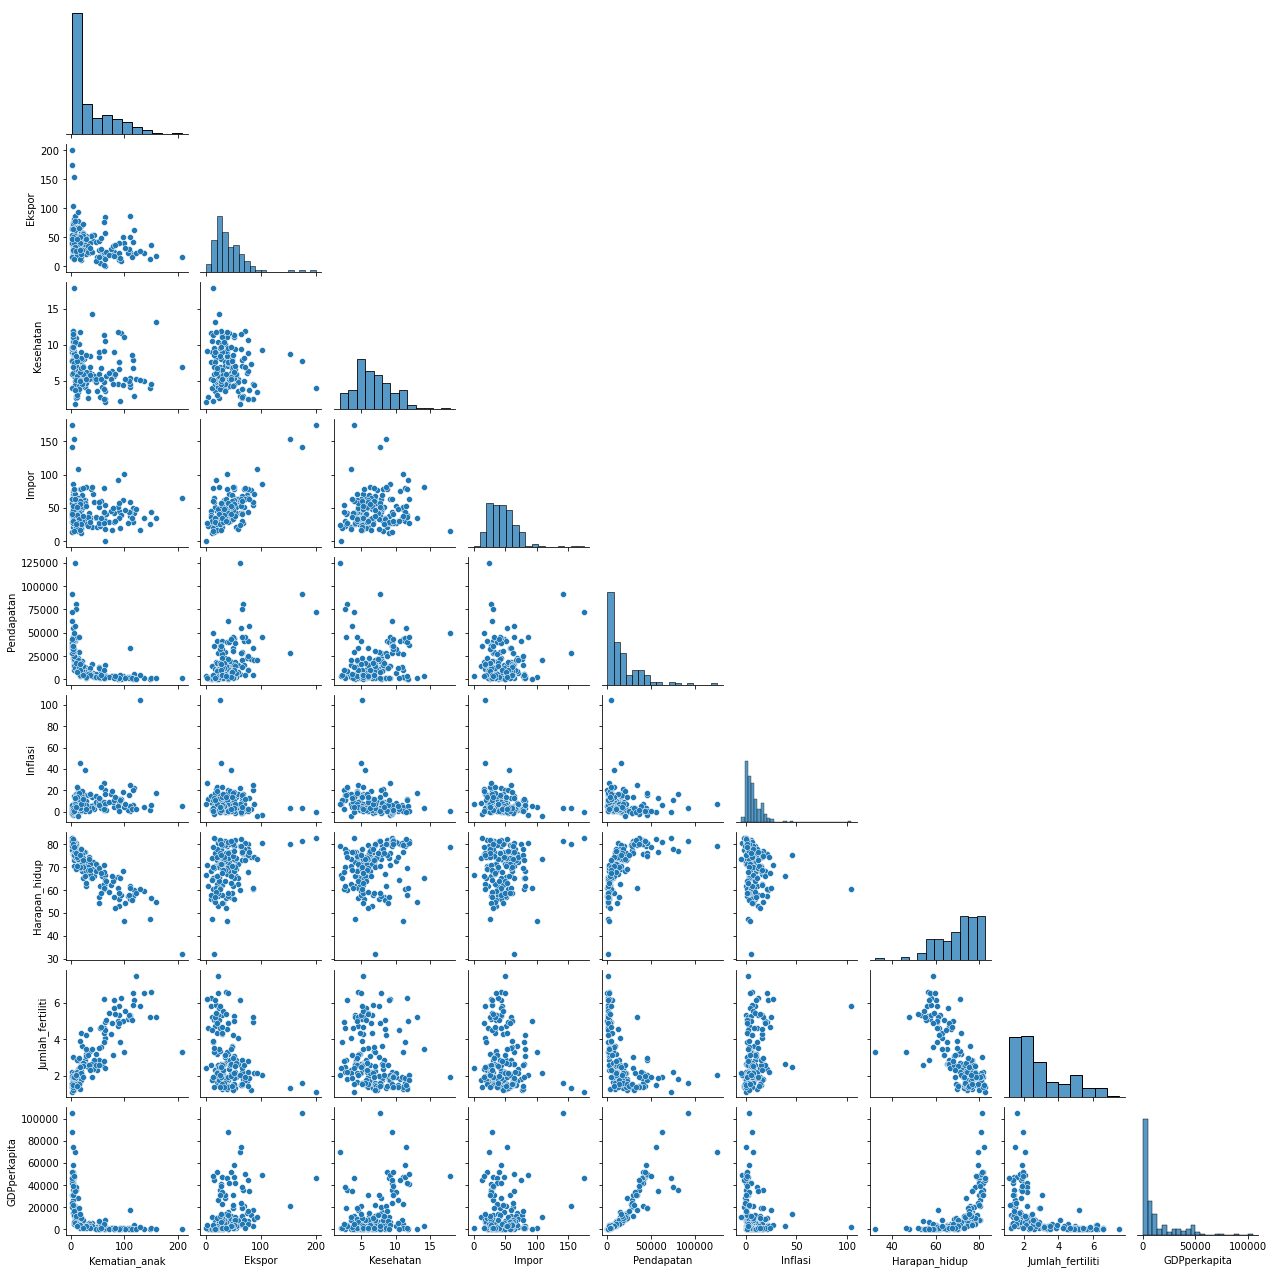

In [72]:
sns.pairplot(data = df, corner = True, height = 2)

<AxesSubplot:>

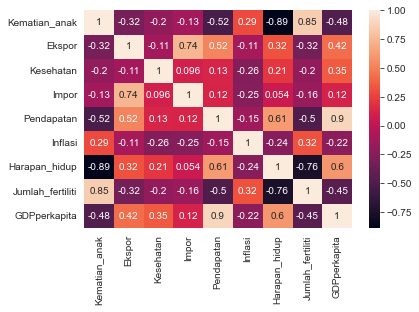

In [170]:
corr = df.corr()

sns.heatmap(data = corr, annot = True, cbar = True, square = False)

<AxesSubplot:>

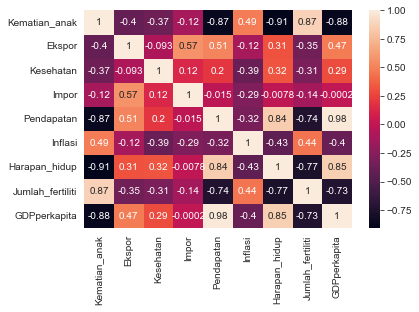

In [171]:
# dengan ditemukannya data-data dengan korelasi yang eksponensial, saya mencoba untuk menggunakan spearman correlation
sns.heatmap(data = corr_spearman, annot = True, cbar = True, square = False)

# Checking for outliers

<AxesSubplot:xlabel='Kematian_anak'>

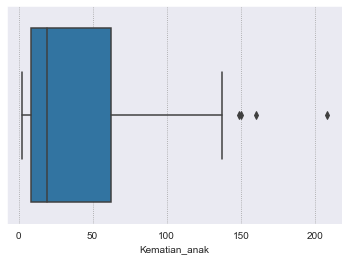

In [174]:
sns.boxplot(data = df, x = "Kematian_anak")

<AxesSubplot:xlabel='GDPperkapita'>

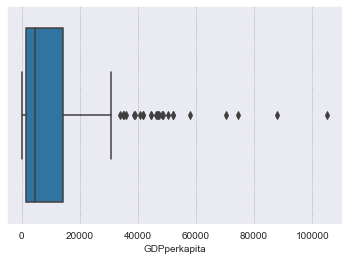

In [175]:
sns.boxplot(data = df, x = "GDPperkapita")

# Handling Outlier
## Notes :
outlier tidak dibuang, tapi dinormalisasi dengan np.log karena asumsi ketimpangan ada.

In [184]:
df_analysis = df[['Negara', 'Kematian_anak', 'GDPperkapita']].copy()
df_a = np.log(df[['Kematian_anak', 'GDPperkapita']].copy())
df_a

,Kematian_anak,GDPperkapita
0,4.502029,6.315358
1,2.809403,8.316300
2,3.306887,8.402904
3,4.779123,8.169053
4,2.332144,9.409191
...,...,...
162,3.374169,7.996317
163,2.839078,9.510445
164,3.148453,7.177782
165,4.030695,7.177782


C:\Users\A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kematian_anak'>

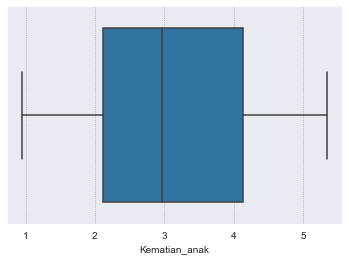

In [186]:
sns.boxplot(df_a["Kematian_anak"])

C:\Users\A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDPperkapita'>

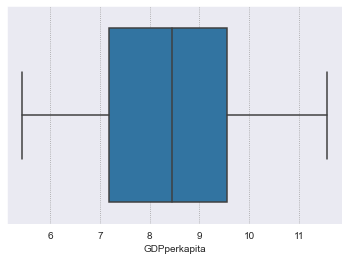

In [185]:
sns.boxplot(df_a["GDPperkapita"])

# univariate analysis

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
max      208.000000
Name: Kematian_anak, dtype: float64

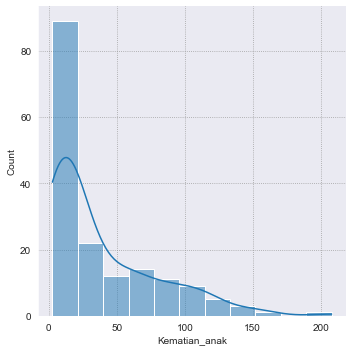

In [187]:
#displot
sns.displot(data = df, x = "Kematian_anak", kde=True)
df["Kematian_anak"].describe()

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
max      105000.000000
Name: GDPperkapita, dtype: float64

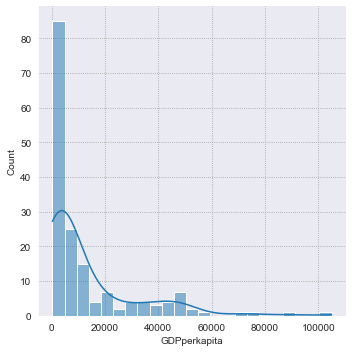

In [188]:
sns.displot(data = df, x = "GDPperkapita", kde=True)
df["GDPperkapita"].describe()

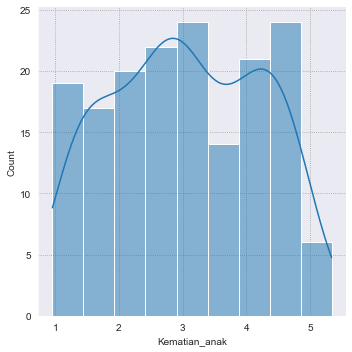

In [189]:
#transformed
sns.displot(data = df_a, x = "Kematian_anak", kde=True)

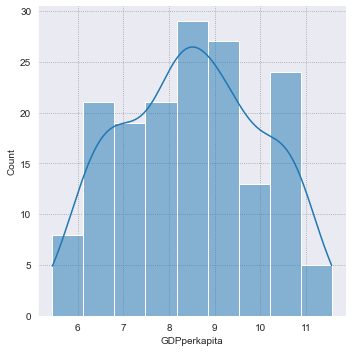

In [190]:
#transformed
sns.displot(data = df_a, x = "GDPperkapita", kde=True)

# bivariate analysis

<AxesSubplot:xlabel='GDPperkapita', ylabel='Kematian_anak'>

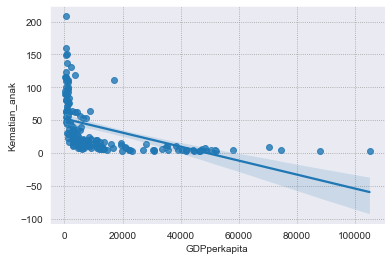

In [191]:
#belum ditransform
sns.regplot(data = df, x = "GDPperkapita", y = "Kematian_anak")

<AxesSubplot:xlabel='GDPperkapita', ylabel='Kematian_anak'>

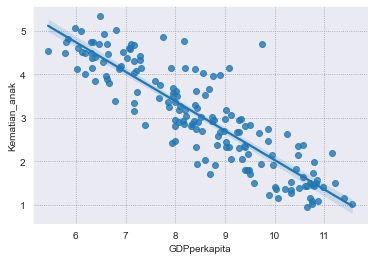

In [192]:
#sesudah ditransform
sns.regplot(data = df_a, x = "GDPperkapita", y = "Kematian_anak")

# Clustering with K-means 

## Deciding number of clusters 

In [193]:
df_analysis = df[['Negara','Kematian_anak', 'GDPperkapita']].copy()
df_analysis

,Negara,Kematian_anak,GDPperkapita
0,Afghanistan,90.2,553
1,Albania,16.6,4090
2,Algeria,27.3,4460
3,Angola,119.0,3530
4,Antigua and Barbuda,10.3,12200
...,...,...,...
162,Vanuatu,29.2,2970
163,Venezuela,17.1,13500
164,Vietnam,23.3,1310
165,Yemen,56.3,1310


In [194]:
from tqdm import tqdm

In [195]:
result = {}
result['k'] = []
result['wcss'] = []
result['silhouette'] = []

for k in range(1, 10+1):
    kmeans = KMeans(n_clusters=k)
    
    # Training
    kmeans.fit(df_a)
    
    # Store to var
    wcss = kmeans.inertia_
    n_k = k
    result['k'].append(n_k)
    result['wcss'].append(wcss)
    
    if k >= 2:
        prediction = kmeans.predict(df_a)
        result['silhouette'].append(silhouette_score(df_a, prediction))

C:\Users\A\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [196]:
result

{'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'wcss': [596.8934053840353,
  198.82583135945927,
  94.95161486989315,
  65.88057695391335,
  54.89851747301108,
  45.53088771779878,
  41.06510189112102,
  35.53964275467958,
  31.334952095225425,
  28.332777070803758],
 'silhouette': [0.5309650511010379,
  0.5228888414108422,
  0.4818602751441785,
  0.423224948907246,
  0.4269434950708988,
  0.3895800270357911,
  0.38112374860228226,
  0.37827509062810305,
  0.373219552498512]}

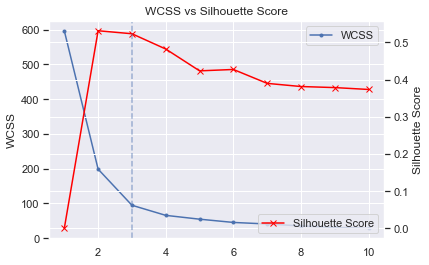

In [197]:
sns.set()
fig, ax1 = plt.subplots()

# Generate second x axis
ax2 = ax1.twinx()

# Draw wcss plot
ax1.plot(result['k'], result['wcss'], label='WCSS', marker='.')
ax1.set_ylabel('WCSS')

# Draw silhouette plot
ax2.plot(result['k'], [0]+result['silhouette'], c='red', label='Silhouette Score', marker='x')
ax2.set_ylabel('Silhouette Score')

# Draw vertical line
plt.axvline(3, linestyle='--', alpha=.5)

# Show legend
ax1.legend()
ax2.legend(loc='lower right')
plt.title('WCSS vs Silhouette Score')

# Show
plt.show()

In [198]:
k3 = KMeans(n_clusters=3, random_state=10)

k3.fit(df_a)
df_a['kluster'] = k3.labels_
df_a

,Kematian_anak,GDPperkapita,kluster
0,4.502029,6.315358,2
1,2.809403,8.316300,0
2,3.306887,8.402904,0
3,4.779123,8.169053,2
4,2.332144,9.409191,0
...,...,...,...
162,3.374169,7.996317,0
163,2.839078,9.510445,0
164,3.148453,7.177782,2
165,4.030695,7.177782,2


## Centroid finding and plotting

In [199]:
centers = k3.cluster_centers_
centers

array([[ 2.99691957,  8.59017936],
       [ 1.64731483, 10.3625133 ],
       [ 4.35447615,  6.73156601]])

In [200]:
centroidX = centers[:,0]
centroidX

array([2.99691957, 1.64731483, 4.35447615])

In [201]:
centroidY = centers[:,1]
centroidY

array([ 8.59017936, 10.3625133 ,  6.73156601])

Text(0, 0.5, 'GDP per kapita')

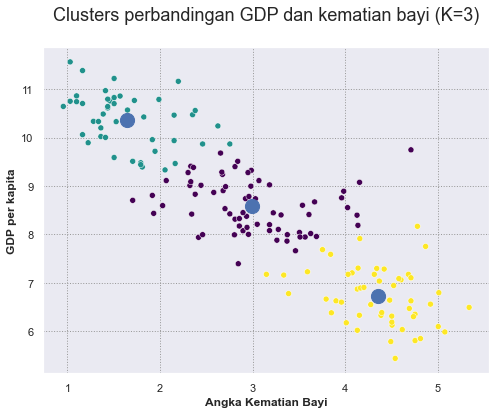

In [226]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data = df_a, 
                y = df_a['GDPperkapita'], 
                x = df_a['Kematian_anak'], 
                c = df_a['kluster'], 
                cmap = 'viridis',
                legend = 'full',
               )
ax.scatter(centroidX, centroidY, marker='o', s = 200)

markers = [plt.Line2D([0,0],[0,0], color=color, marker='o', linestyle='') for color in colorDict.values()]


ax.set_title('Clusters perbandingan GDP dan kematian bayi (K=3)\n', fontsize=18)
ax.set_xlabel('Angka Kematian Bayi', fontsize=12, weight='bold')
ax.set_ylabel('GDP per kapita', fontsize=12, weight='bold')

In [255]:
df_clustered.groupby('kluster')[['Kematian_anak', 'GDPperkapita']].mean().sort_values('Kematian_anak')

,Kematian_anak,GDPperkapita
kluster,,
1,5.778261,36660.869565
0,24.195652,6185.507246
2,85.688462,996.423077


In [256]:
kluster_map = {0: 'B', 1: 'A', 2: 'C'}
df_clustered['kluster'] = df_clustered['kluster'].map(kluster_map)

In [244]:
df_clustered = df_analysis.assign(kluster = df_a['kluster'])
df_clustered

,Negara,Kematian_anak,GDPperkapita,kluster
0,Afghanistan,90.2,553,2
1,Albania,16.6,4090,0
2,Algeria,27.3,4460,0
3,Angola,119.0,3530,2
4,Antigua and Barbuda,10.3,12200,0
...,...,...,...,...
162,Vanuatu,29.2,2970,0
163,Venezuela,17.1,13500,0
164,Vietnam,23.3,1310,2
165,Yemen,56.3,1310,2


# Memilih negara penerima bantuan kemanusiaan

In [257]:
C = df_clustered[df_clustered['kluster']=='C'].reset_index()
B = df_clustered[df_clustered['kluster']=='B'].reset_index()
A = df_clustered[df_clustered['kluster']=='A'].reset_index()

In [263]:
df_clustered[df_clustered['kluster']=='C'].sort_values(by="Kematian_anak", ascending = False)

,Negara,Kematian_anak,GDPperkapita,kluster
66,Haiti,208.0,662,C
132,Sierra Leone,160.0,399,C
32,Chad,150.0,897,C
31,Central African Republic,149.0,446,C
97,Mali,137.0,708,C
113,Nigeria,130.0,2330,C
112,Niger,123.0,348,C
3,Angola,119.0,3530,C
37,"Congo, Dem. Rep.",116.0,334,C
25,Burkina Faso,116.0,575,C
